In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**Dataframe Exploration**

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_train = train_df.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1)
data_test = test_df.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1)

In [4]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [5]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
categorical_cols = [cname for cname in data_train.columns if
                    data_train[cname].nunique() <= 10 and
                    data_train[cname].dtype == 'object'
                   ]
numerical_cols = [cname for cname in data_train.columns if
                    data_train[cname].dtype in ['int64', 'float64']
                 ]

In [7]:
categorical_cols, numerical_cols

(['Sex', 'Embarked'], ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

**Data Cleaning**

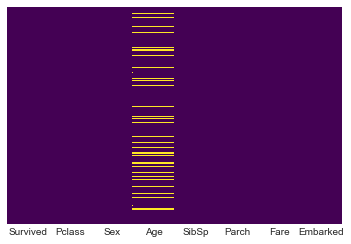

In [8]:
sns.heatmap(data_train.isnull(), yticklabels = False, cbar = False, cmap="viridis")

In [9]:
data_train.Age = data_train['Age'].fillna(data_train['Age'].median())
data_test.Age = data_test['Age'].fillna(data_test['Age'].median())

In [10]:
data_test.Fare = data_test['Fare'].fillna(data_test['Fare'].median())

In [11]:
data_train.dropna(subset=['Embarked'], inplace=True)

In [12]:
data_train = pd.get_dummies(data_train)
data_test = pd.get_dummies(data_test)

**Training**

In [13]:
data_train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [14]:
x_train,x_test,y_train,y_test = train_test_split(data_train.drop('Survived', axis=1), data_train['Survived'], test_size=0.2)

**Prediction**

In [15]:

classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
y_pred= classifier.predict(x_test)

In [17]:

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[96 19]
 [21 42]]


0.7752808988764045

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       115
           1       0.69      0.67      0.68        63

    accuracy                           0.78       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.77      0.78      0.77       178



In [19]:

pd.set_option('max_rows', None)
output = pd.DataFrame({'PassengerId':test_df.PassengerId, 'Survived':classifier.predict(data_test)})
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [20]:
output.to_csv('outputDATA.csv', index=False)
print('Output CSV is ready!')

Output CSV is ready!


In [24]:
if len(output) == len(test_df):
    print("result dataframe is the same length as test ({} rows).".format(len(output)))
else:
    print("Dataframes mismatched.")

result dataframe is the same length as test (418 rows).
